In [1]:
from tensorflow.keras.models import load_model

model = load_model('newmodel.h5')


In [57]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set the directory path where the images are located
# image_directory = 'C:/Users/USER/Desktop/main-project/dataset/content/Test/Fighting'

# # Create an ImageDataGenerator object to load and preprocess the images
# data_generator = ImageDataGenerator(rescale=1./255)

# # Create a generator to load the images from the directory
# image_generator = data_generator.flow_from_directory(
#     image_directory,
#     target_size=(224, 224),  # Set the target size of the images
#     batch_size=32,  # Set the batch size
#     class_mode='categorical',  # Set the class mode
#     shuffle=False  # Set shuffle to False to maintain the order of the images
# )

# # Use the predict_generator() method to predict the images
# predictions = model.predict_generator(image_generator)

# # Print the predictions
# print(predictions)

# from tensorflow.keras.preprocessing import image
# import numpy as np

# # Load and preprocess a single image
# img_path = './steal.png'  # Replace 'path_to_your_image.jpg' with the path to your image
# img = image.load_img(img_path, target_size=(128, 128))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array = img_array / 255.  # Normalize the image

# # Predict the image
# prediction = model.predict(img_array)

# # Print the prediction
# print(prediction)

import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Set the directory path where the images are located
main_directory = 'C:/Users/USER/Desktop/main-project/dataset/content/Test'

# List all files in the directory
# image_files = os.listdir(image_directory)

folders = os.listdir(main_directory)

for folder in folders:
    image_directory = os.path.join(main_directory, folder)
    
    if os.path.isdir(image_directory):
        print(f"Predicting images in folder: {folder}")
        
        image_files = os.listdir(image_directory)
        
        # Initialize an empty list to store predictions
        all_predictions = []
        
        for img_file in image_files:
            # Construct the full path to the image
            img_path = os.path.join(image_directory, img_file)
            
            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array / 255.  # Normalize the image
            
            # Predict the image
            prediction = model.predict(img_array)
            
            # Append the prediction to the list of all predictions
            all_predictions.append(prediction)
            
        all_predictions = np.array(all_predictions)
        print(all_predictions)
        print("\n")
# Initialize an empty list to store predictions





1/1 [==============================] - 1s 560ms/step
[[[0.8150626 ]]

 [[0.83573556]]

 [[0.8578775 ]]

 ...

 [[0.60686886]]

 [[0.6495235 ]]

 [[0.6248268 ]]]


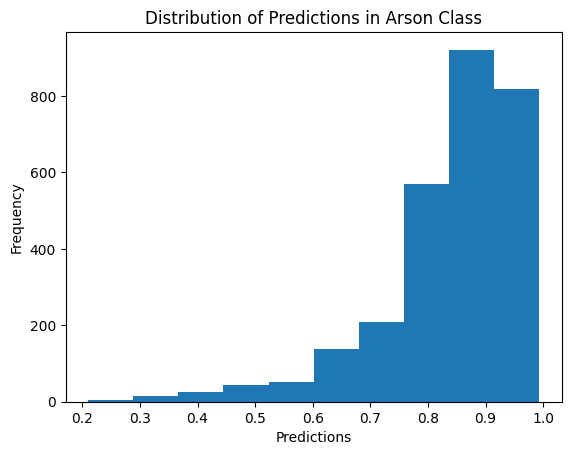

In [58]:
import matplotlib.pyplot as plt

# Flatten the all_predictions array
all_predictions_flat = all_predictions.flatten()

# Plot the curve
plt.hist(all_predictions_flat, bins=10)
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions in Arson Class')
plt.show()


In [59]:
import json

def count_predictions(all_predictions_flat, interval):
    # Count the number of predictions falling within the specified interval
    count = sum(1 for prediction in all_predictions_flat if interval[0] <= prediction < interval[1])
    return count

# Define the intervals
intervals = [(i/20., (i+1)/20.) for i in range(20)]

# Assuming count_predictions function only needs the all_predictions_flat as argument
frequency_dict = {str(interval): count_predictions(all_predictions_flat, interval) for interval in intervals}

# print(frequency_dict)

# Convert the frequency_dict to JSON format
frequency_dict_json = json.dumps(frequency_dict)

# Print the JSON format
print(frequency_dict_json)


{"(0.0, 0.1)": 0, "(0.1, 0.2)": 0, "(0.2, 0.3)": 9, "(0.3, 0.4)": 19, "(0.4, 0.5)": 46, "(0.5, 0.6)": 63, "(0.6, 0.7)": 189, "(0.7, 0.8)": 327, "(0.8, 0.9)": 1156, "(0.9, 1.0)": 984}


Predicting images in folder: Abuse
1/1 [==============================] - 1s 818ms/step


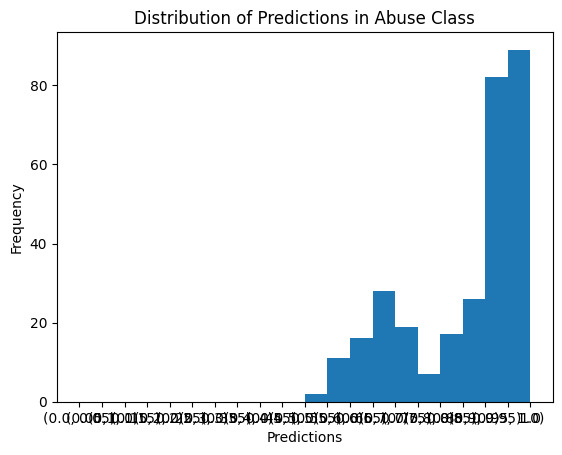

{"(0.0, 0.05)": 0, "(0.05, 0.1)": 0, "(0.1, 0.15)": 0, "(0.15, 0.2)": 0, "(0.2, 0.25)": 0, "(0.25, 0.3)": 0, "(0.3, 0.35)": 0, "(0.35, 0.4)": 0, "(0.4, 0.45)": 0, "(0.45, 0.5)": 0, "(0.5, 0.55)": 2, "(0.55, 0.6)": 11, "(0.6, 0.65)": 16, "(0.65, 0.7)": 28, "(0.7, 0.75)": 19, "(0.75, 0.8)": 7, "(0.8, 0.85)": 17, "(0.85, 0.9)": 26, "(0.9, 0.95)": 82, "(0.95, 1.0)": 89}
Predicting images in folder: Arrest
1/1 [==============================] - 2s 2s/step


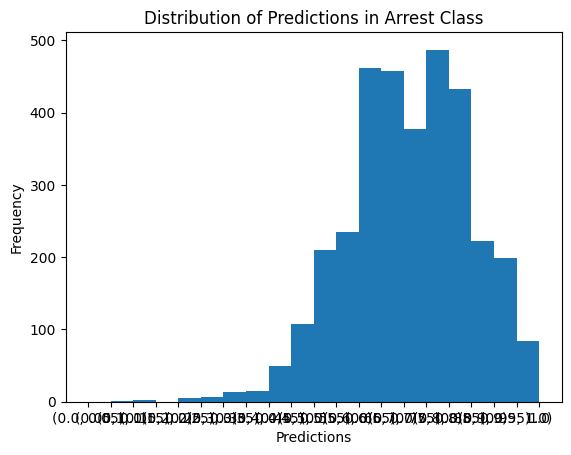

{"(0.0, 0.05)": 0, "(0.05, 0.1)": 1, "(0.1, 0.15)": 2, "(0.15, 0.2)": 0, "(0.2, 0.25)": 5, "(0.25, 0.3)": 6, "(0.3, 0.35)": 13, "(0.35, 0.4)": 15, "(0.4, 0.45)": 49, "(0.45, 0.5)": 107, "(0.5, 0.55)": 210, "(0.55, 0.6)": 235, "(0.6, 0.65)": 462, "(0.65, 0.7)": 458, "(0.7, 0.75)": 378, "(0.75, 0.8)": 487, "(0.8, 0.85)": 432, "(0.85, 0.9)": 222, "(0.9, 0.95)": 199, "(0.95, 1.0)": 84}
Predicting images in folder: Arson
1/1 [==============================] - 3s 3s/step


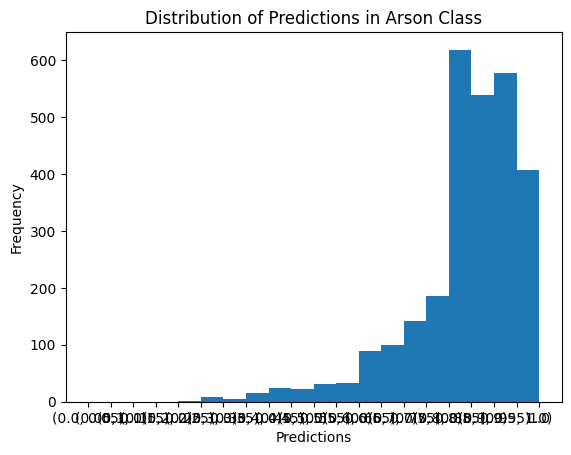

{"(0.0, 0.05)": 0, "(0.05, 0.1)": 0, "(0.1, 0.15)": 0, "(0.15, 0.2)": 0, "(0.2, 0.25)": 1, "(0.25, 0.3)": 8, "(0.3, 0.35)": 4, "(0.35, 0.4)": 15, "(0.4, 0.45)": 24, "(0.45, 0.5)": 22, "(0.5, 0.55)": 31, "(0.55, 0.6)": 32, "(0.6, 0.65)": 89, "(0.65, 0.7)": 100, "(0.7, 0.75)": 142, "(0.75, 0.8)": 185, "(0.8, 0.85)": 618, "(0.85, 0.9)": 538, "(0.9, 0.95)": 577, "(0.95, 1.0)": 407}
Predicting images in folder: Assault
1/1 [==============================] - 3s 3s/step


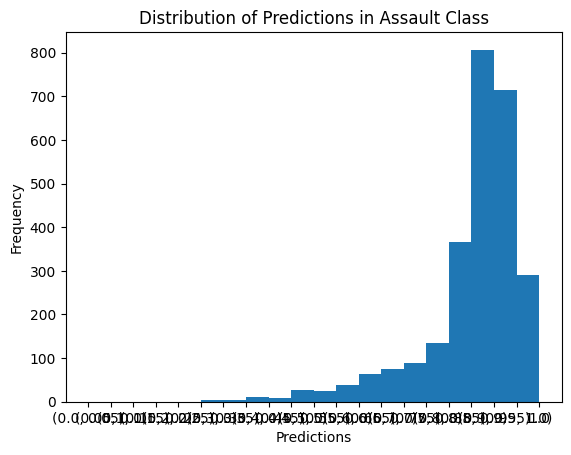

{"(0.0, 0.05)": 0, "(0.05, 0.1)": 0, "(0.1, 0.15)": 0, "(0.15, 0.2)": 0, "(0.2, 0.25)": 0, "(0.25, 0.3)": 4, "(0.3, 0.35)": 5, "(0.35, 0.4)": 11, "(0.4, 0.45)": 9, "(0.45, 0.5)": 27, "(0.5, 0.55)": 24, "(0.55, 0.6)": 38, "(0.6, 0.65)": 63, "(0.65, 0.7)": 75, "(0.7, 0.75)": 88, "(0.75, 0.8)": 135, "(0.8, 0.85)": 367, "(0.85, 0.9)": 807, "(0.9, 0.95)": 714, "(0.95, 1.0)": 290}
Predicting images in folder: Burglary
1/1 [==============================] - 7s 7s/step


In [61]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import json

# Set the directory path where the folders of images are located
main_directory = 'C:/Users/USER/Desktop/main-project/dataset/content/Test'

# Get the list of folders inside the main directory
folders = os.listdir(main_directory)

# Iterate through each folder
for folder in folders:
    image_directory = os.path.join(main_directory, folder)
    
    # Check if the item in the main directory is a folder
    if os.path.isdir(image_directory):
        print(f"Predicting images in folder: {folder}")
        
        # List all files in the directory
        image_files = os.listdir(image_directory)
        
        # Initialize an empty list to store predictions
        all_predictions = []

        # Iterate through each image file
        for img_file in image_files:
            # Construct the full path to the image
            img_path = os.path.join(image_directory, img_file)
            
            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = img_array / 255.  # Normalize the image
            
            # Predict the image
            prediction = model.predict(img_array)
            
            # Append the prediction to the list of all predictions
            all_predictions.append(prediction)

        # Convert the list of predictions to a numpy array
        all_predictions = np.array(all_predictions)
        
        # Flatten the all_predictions array
        all_predictions_flat = all_predictions.flatten()

        # Plot the curve
        intervals = [(i/20., (i+1)/20.) for i in range(20)]

        # Plot the histogram with custom x-axis range
        plt.hist(all_predictions_flat, bins=[interval[0] for interval in intervals] + [1.0])
        plt.xlabel('Predictions')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Predictions in {folder} Class')
        plt.xticks([interval[0] for interval in intervals] + [1.0], [str(interval) for interval in intervals] + ['1.0'])
        plt.show()

        # Calculate frequency distribution
        frequency_dict = {str(interval): count_predictions(all_predictions_flat, interval) for interval in intervals}

        # Convert the frequency_dict to JSON format
        frequency_dict_json = json.dumps(frequency_dict)

        # Print the JSON format
        print(frequency_dict_json)


In [55]:
# def prediction(directory):
#     image_files = os.listdir(directory)

#     # Initialize an empty list to store predictions
#     all_predictions = []

#     # Iterate through each image file
#     for img_file in image_files:
#         # Construct the full path to the image
#         img_path = os.path.join(image_directory, img_file)
        
#         # Load and preprocess the image
#         img = image.load_img(img_path, target_size=(224, 224))
#         img_array = image.img_to_array(img)
#         img_array = np.expand_dims(img_array, axis=0)
#         img_array = img_array / 255.  # Normalize the image
        
#         # Predict the image
#         prediction = model.predict(img_array)
        
#         # Append the prediction to the list of all predictions
#         all_predictions.append(prediction)

#     # Convert the list of predictions to a numpy array
#     all_predictions = np.array(all_predictions)

#     # Print the predictions
#     print(all_predictions)
    
#     graph(all_predictions,'Abuse')


In [56]:
# directory='C:/Users/USER/Desktop/main-project/dataset/content/Test/Abuse'
# # image_files = os.listdir(image_directory)
# prediction(directory)